## 多层感知机
---

### ReLu函数

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('..')
import d2lzh_pytorch as d2l
# 画图函数
def xyplot(x_vals, y_vals, name):
    d2l.set_figsize(figsize=(5, 2.5))
    d2l.plt.plot(x_vals.detach(), y_vals.detach().numpy())
    d2l.plt.xlabel('x')
    d2l.plt.ylabel(name + '(x)')

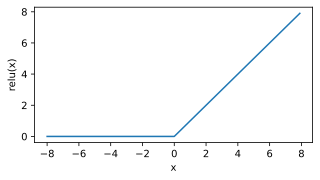

In [2]:
x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True)
y = x.relu()
xyplot(x, y, 'relu')

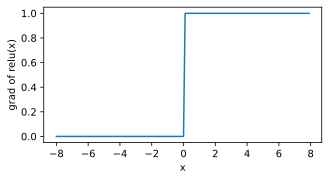

In [3]:
# relu导数
y.sum().backward()
xyplot(x, x.grad, 'grad of relu')

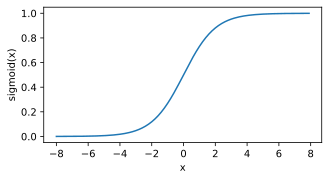

In [4]:
y = x.sigmoid()
xyplot(x, y, 'sigmoid')

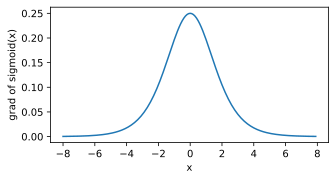

In [5]:
# sigmoid 导数
x.grad.zero_()
y.sum().backward()
xyplot(x, x.grad, 'grad of sigmoid')

In [6]:
# tanh函数（双曲正切）

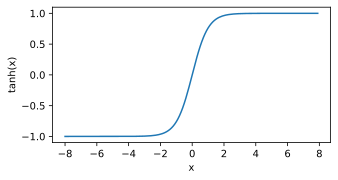

In [7]:
y = x.tanh()
xyplot(x, y, 'tanh')

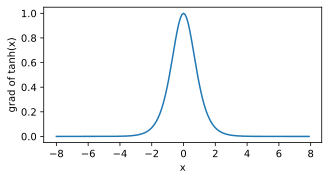

In [8]:
# tanh导数: 可以将元素的值变换到-1和1之间
x.grad.zero_()
y.sum().backward()
xyplot(x, x.grad, 'grad of tanh')

### 手动实现多层感知机

In [9]:
import torch
import numpy as np
import sys
sys.path.append('..')
import d2lzh_pytorch as d2l

In [10]:
batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

d:\anaconda3\envs\pytorch_gpu_1\lib\site-packages\torchvision\datasets\mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [11]:
num_inputs, num_outputs, num_hiddens = 784, 10, 256

W1 = torch.tensor(np.random.normal(0, 0.01, (num_inputs, num_hiddens)), dtype=torch.float)
b1 = torch.zeros(num_hiddens, dtype=torch.float)
W2 = torch.tensor(np.random.normal(0, 0.01, (num_hiddens, num_outputs)), dtype=torch.float)
b2 = torch.zeros(num_outputs, dtype=torch.float)

params = [W1, b1, W2, b2]
for param in params:
    param.requires_grad_(requires_grad=True)

In [13]:
def relu(X):
    return torch.max(input=X, other=torch.tensor(0.0))

In [14]:
def net(X):
    X = X.view((-1, num_inputs))
    H = relu(torch.matmul(X, W1) + b1)
    return torch.matmul(H, W2) + b2

In [15]:
loss = torch.nn.CrossEntropyLoss()

In [16]:
num_epochs, lr = 5, 100.0
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, batch_size, params, lr)

epoch 1, loss 0.0031, train acc 0.709, test acc 0.791
epoch 2, loss 0.0019, train acc 0.824, test acc 0.767
epoch 3, loss 0.0017, train acc 0.841, test acc 0.828
epoch 4, loss 0.0015, train acc 0.856, test acc 0.828
epoch 5, loss 0.0014, train acc 0.864, test acc 0.845


### 调库实现多层感知机

In [20]:
num_inputs, num_outputs, num_hiddens = 784, 10, 256

net = torch.nn.Sequential(
    d2l.FlattenLayer(),
    torch.nn.Linear(num_inputs, num_hiddens),
    torch.nn.ReLU(),
    torch.nn.Linear(num_hiddens, num_outputs)
)

for params in net.parameters():
    torch.nn.init.normal_(params, mean=0, std=0.01)

In [21]:
batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
loss = torch.nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(net.parameters(), lr=0.5)

num_epochs = 5
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, batch_size, None, None, optimizer)

epoch 1, loss 0.0032, train acc 0.693, test acc 0.747
epoch 2, loss 0.0019, train acc 0.817, test acc 0.799
epoch 3, loss 0.0017, train acc 0.842, test acc 0.820
epoch 4, loss 0.0015, train acc 0.857, test acc 0.835
epoch 5, loss 0.0015, train acc 0.862, test acc 0.822
